In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
np.random.seed(8407)

## Problem 1.2

In [4]:
def h(X,w):
    return np.sign(X@w)

def feature_matrix(*xs):
    ones = np.ones_like(xs[0])
    return np.column_stack([ones, *xs])

def mesh(x, y):
    xs = np.repeat(x, len(y))
    ys = np.tile(y, len(x))
    return xs, ys

def boundary(x):
    return -2/3*x -1/3

In [5]:
x = np.arange(-2, 2, 0.01)
y = np.arange(-2, 2, 0.01)
b = boundary(x)

xs, ys = mesh(x, y)
X = feature_matrix(xs, ys)

w1 = np.array([1, 2, 3])
w2 = -w1

c1 = h(X, w1)
c2 = h(X, w2)

ics11 = c1 > 0
ics12 = c1 < 0
ics21 = c2 > 0
ics22 = c2 < 0

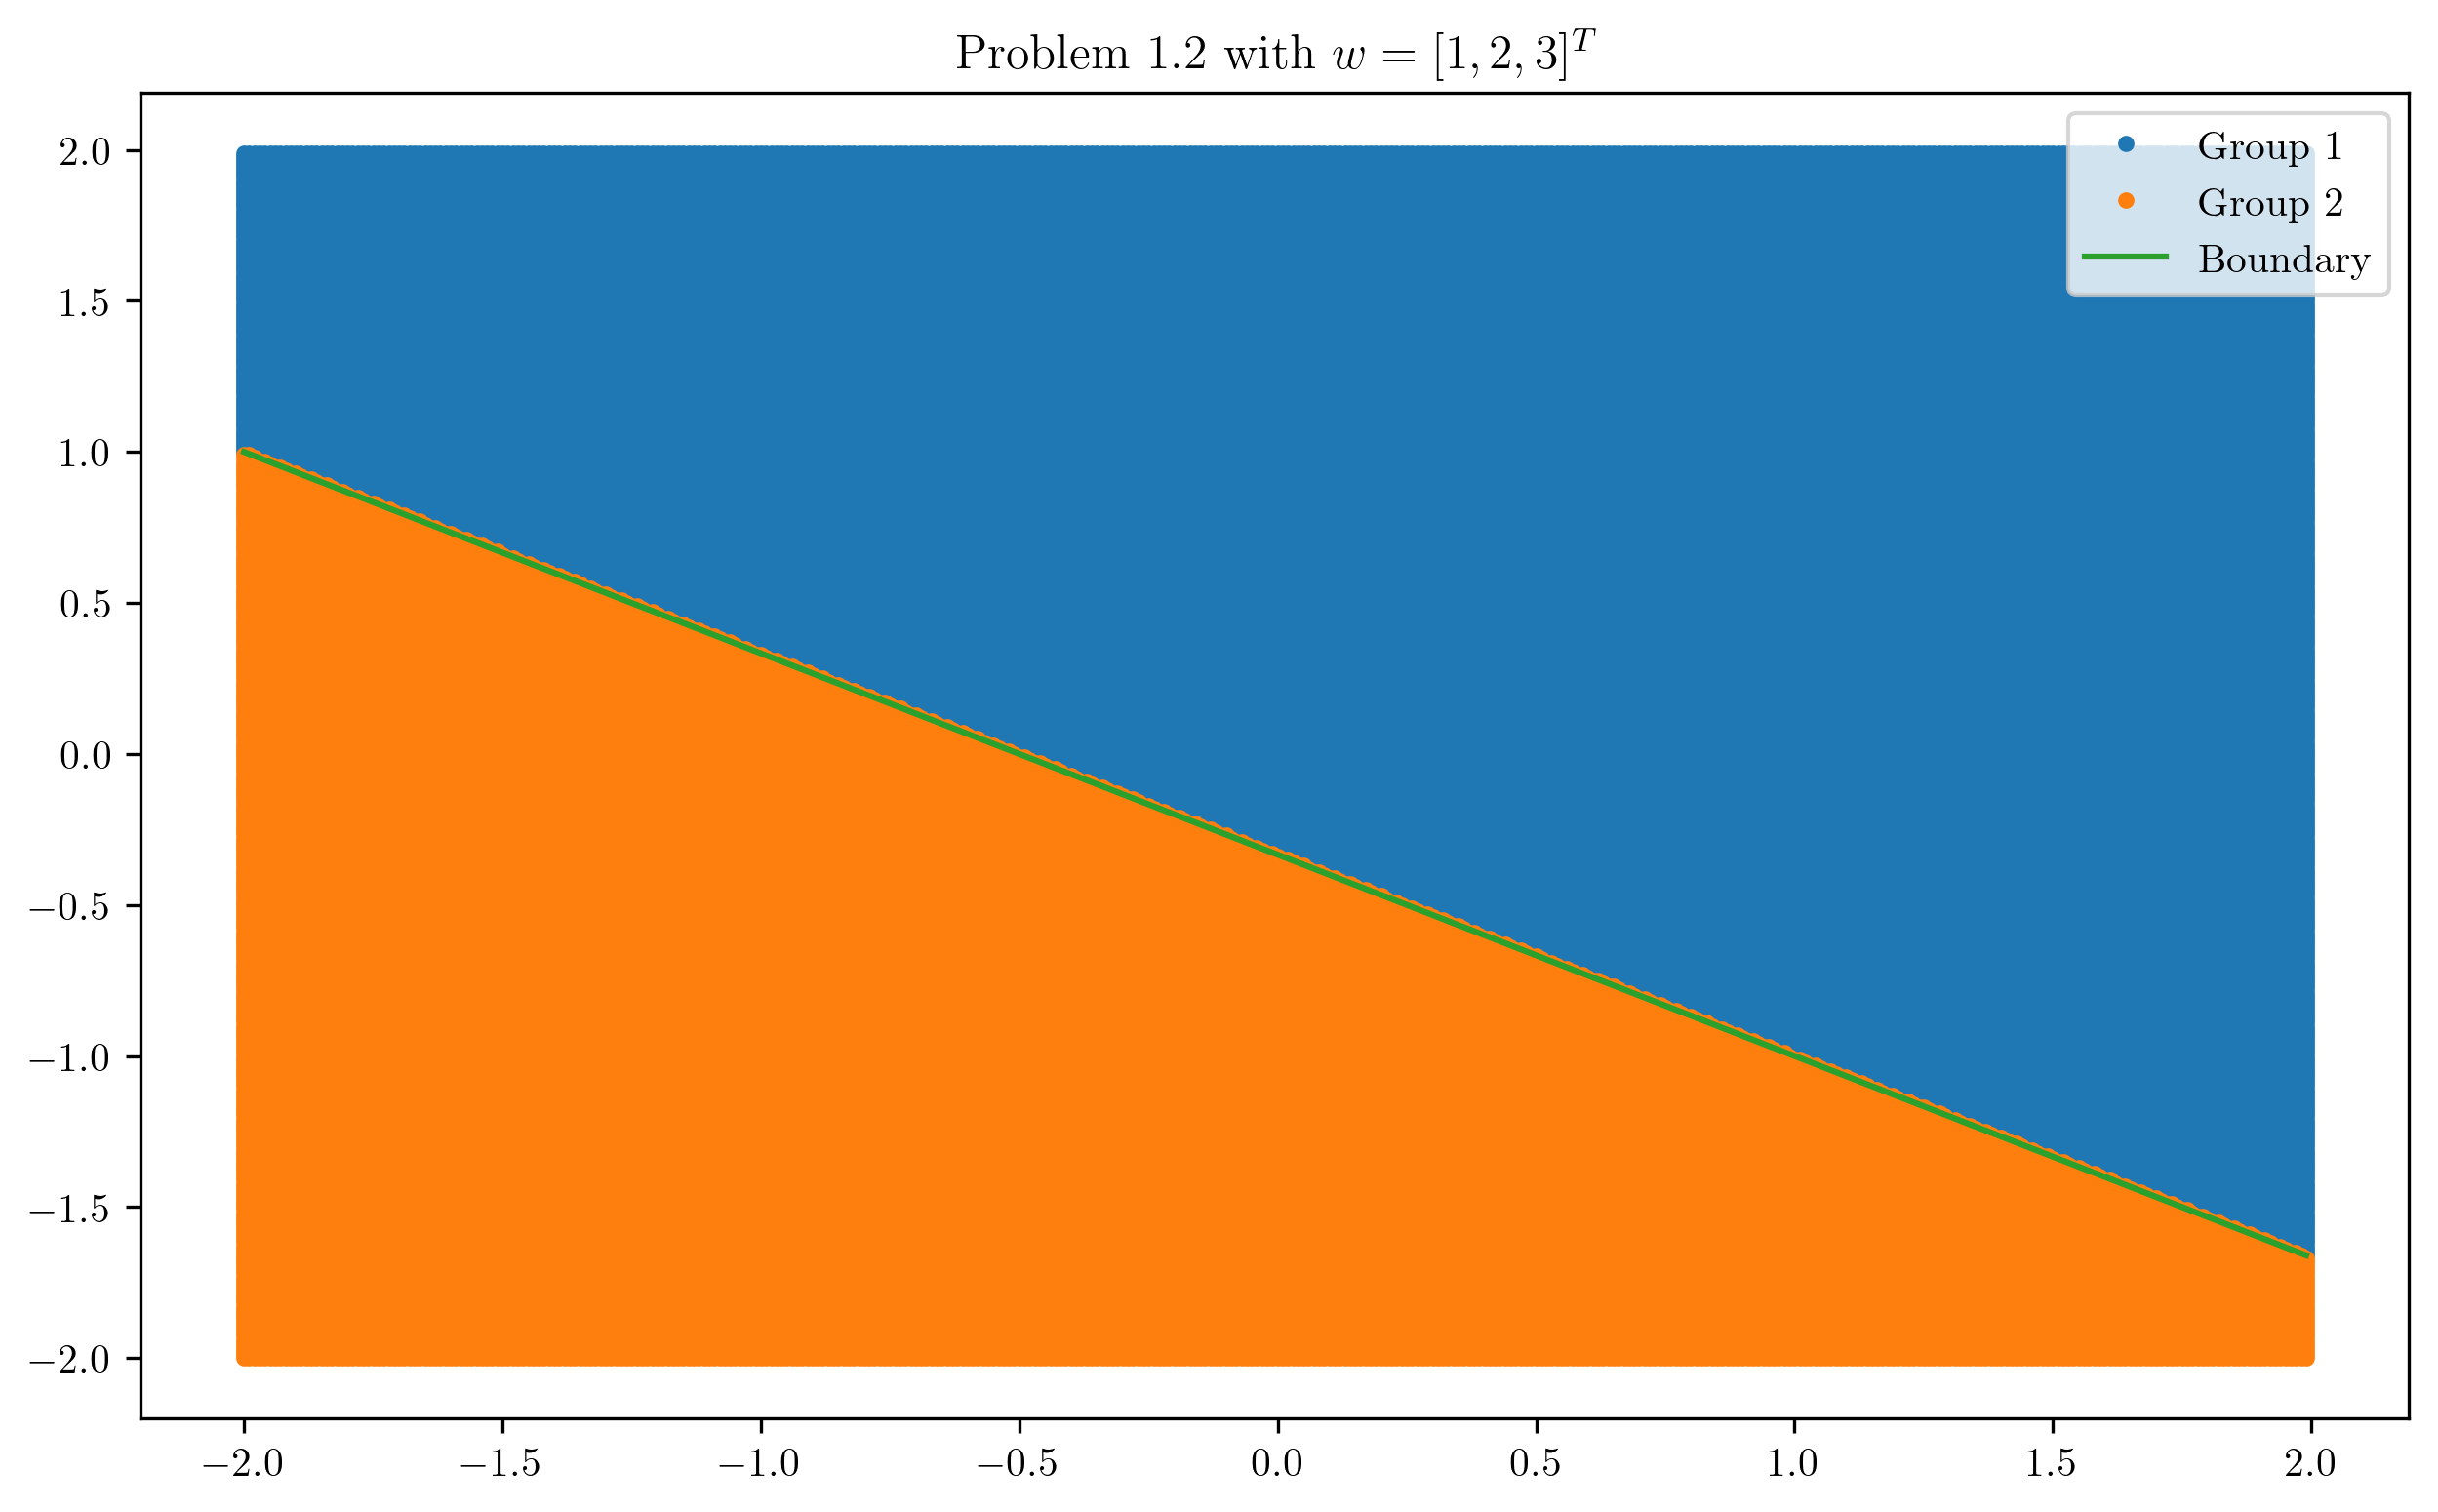

In [6]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(xs[ics11], ys[ics11], '.', label="Group 1")
plt.plot(xs[ics12], ys[ics12], '.', label="Group 2")
plt.plot(x, b, label="Boundary")
plt.title(r"Problem 1.2 with $w = [1,2,3]^T$")
plt.legend()
plt.show()

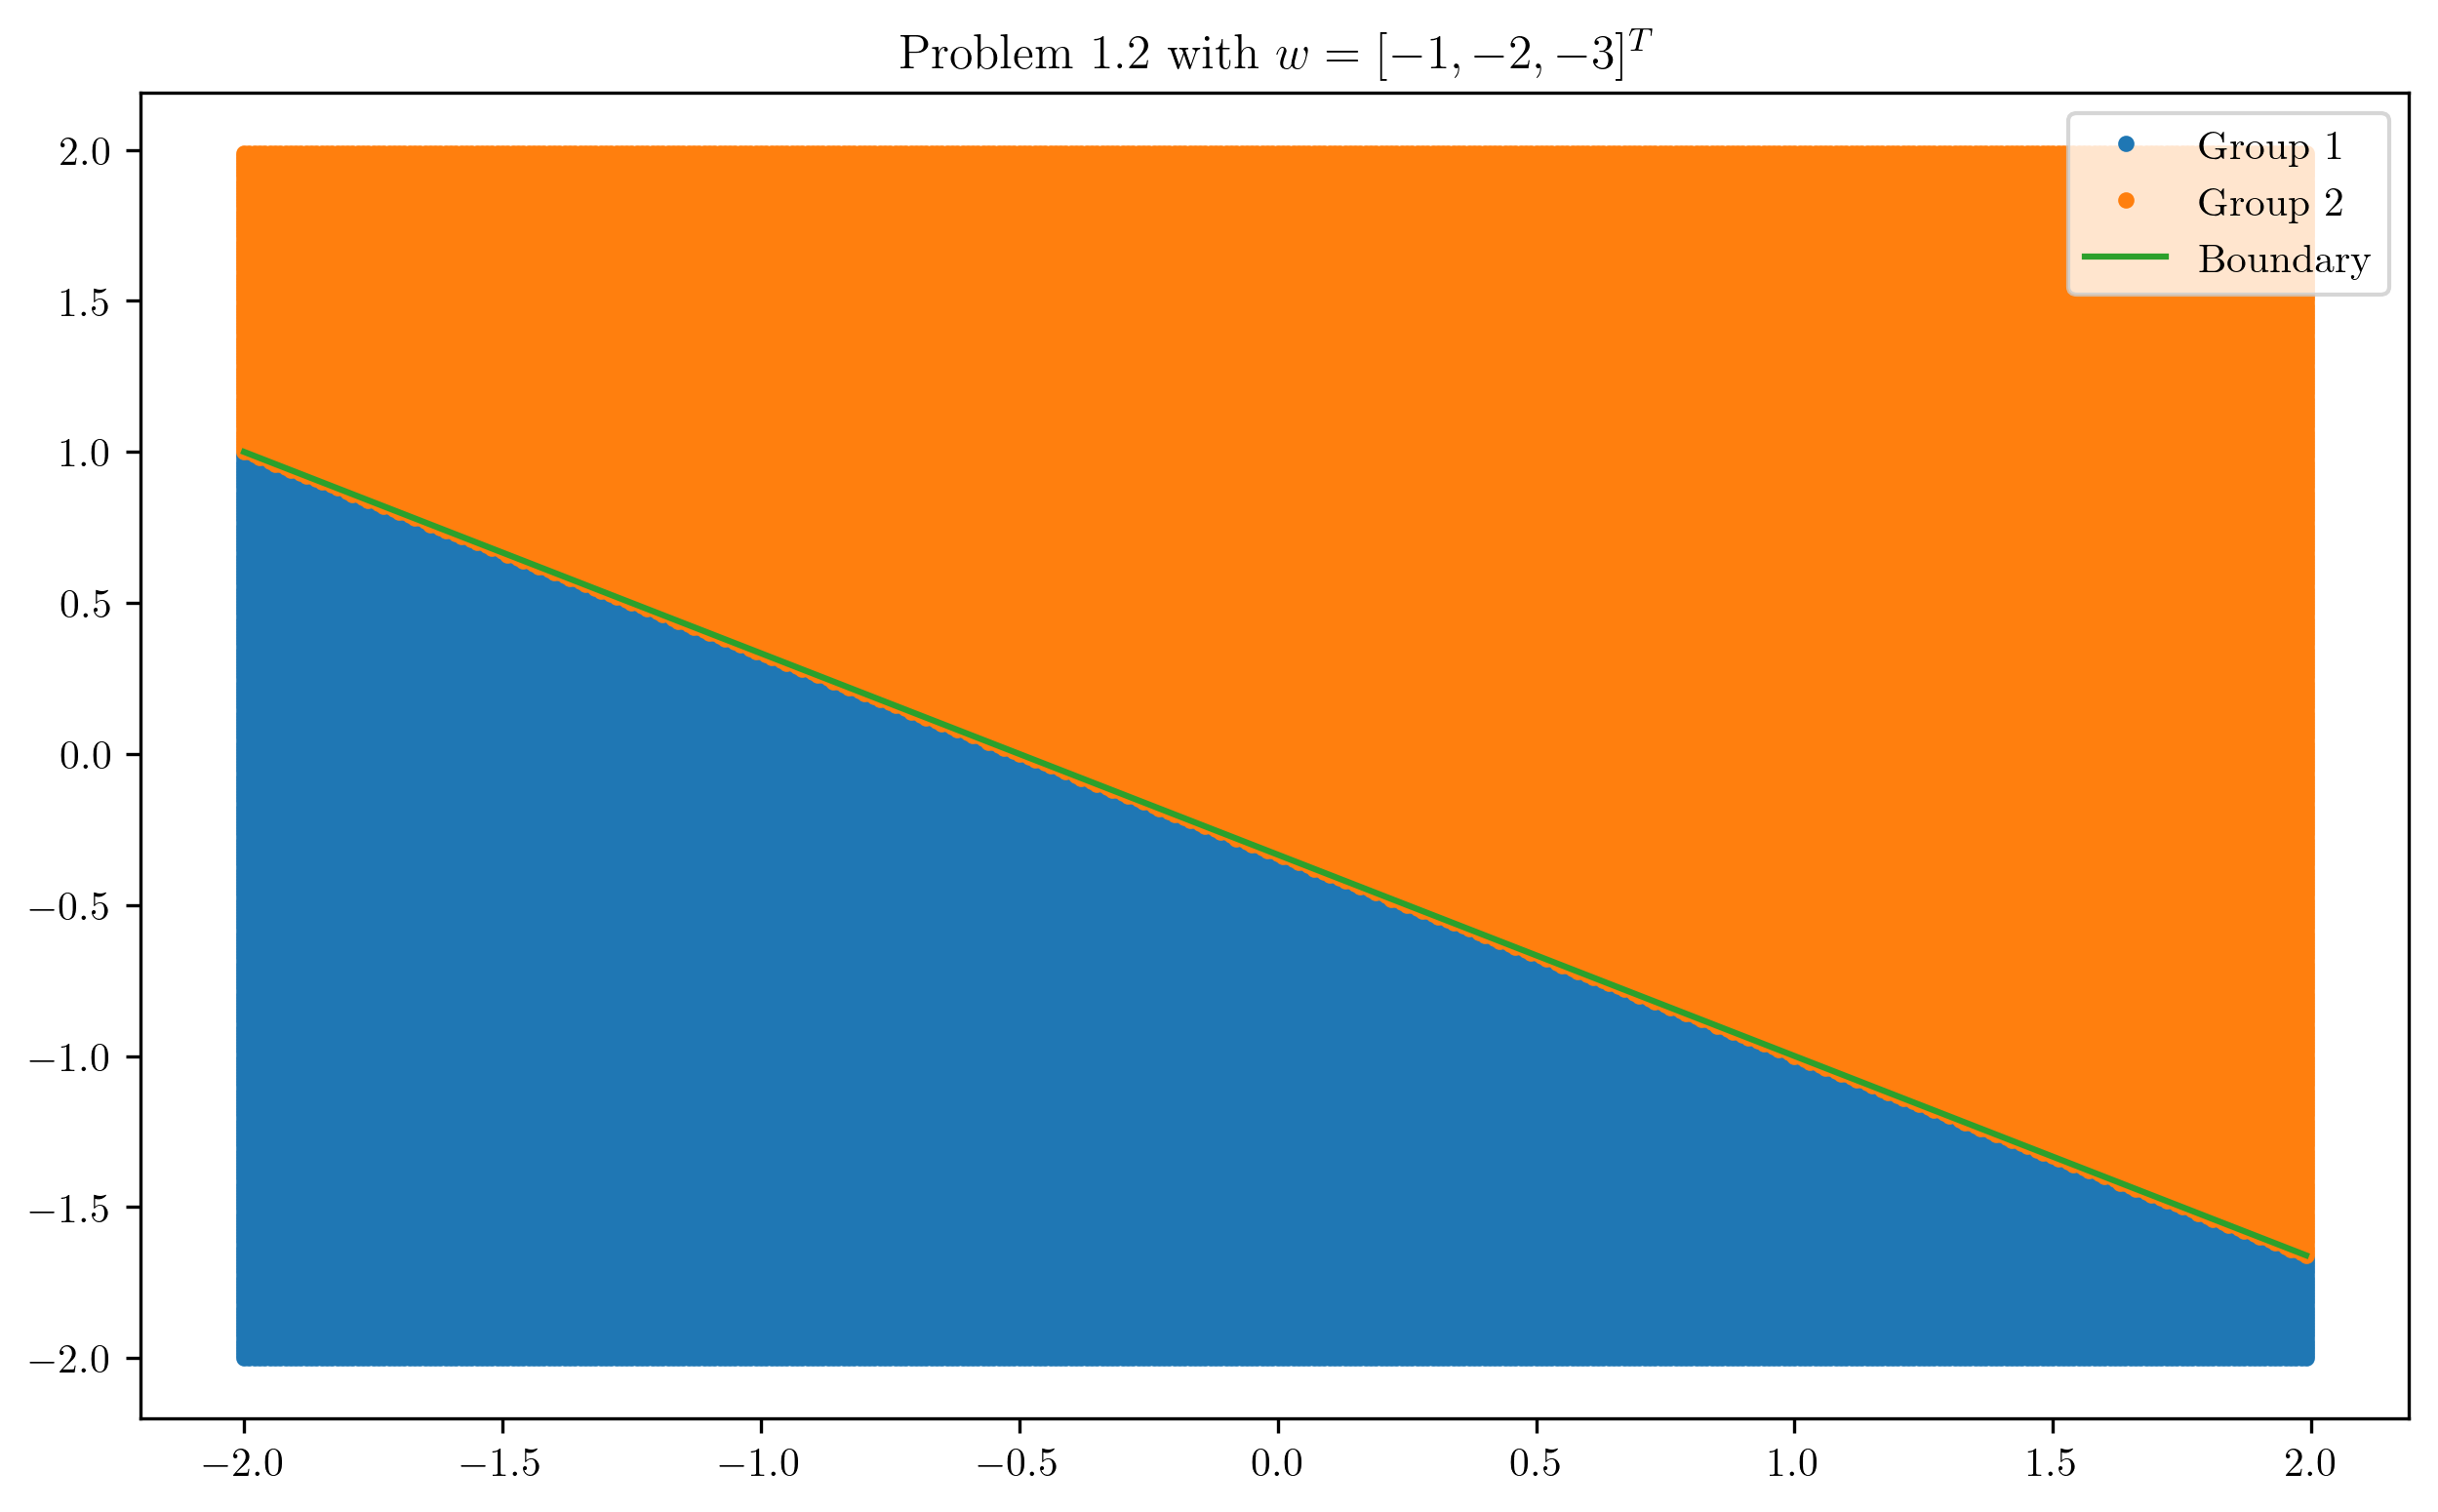

In [7]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(xs[ics21], ys[ics21], '.', label="Group 1")
plt.plot(xs[ics22], ys[ics22], '.', label="Group 2")
plt.title(r"Problem 1.2 with $w = [-1,-2,-3]^T$")
plt.plot(x, b, label="Boundary")
plt.legend()
plt.show()

## Problem 1.4

In [8]:
def gen_data(w, N):
    # Random data
    x = np.random.uniform(-2, 2, N)
    y = np.random.uniform(-2, 2, N)
    
    # Featurize
    X = feature_matrix(x, y)
    
    # Result of perceptron
    c = h(X, w)
    
    # Separate data
    ics1 = c > 0
    ics2 = c <= 0
    g1 = np.column_stack([x[ics1], y[ics1]])
    g2 = np.column_stack([x[ics2], y[ics2]])
    
    return g1, g2

def boundary_fn(w):
    return lambda x: -w[1]/w[2]*x -w[0]/w[2]

### a)

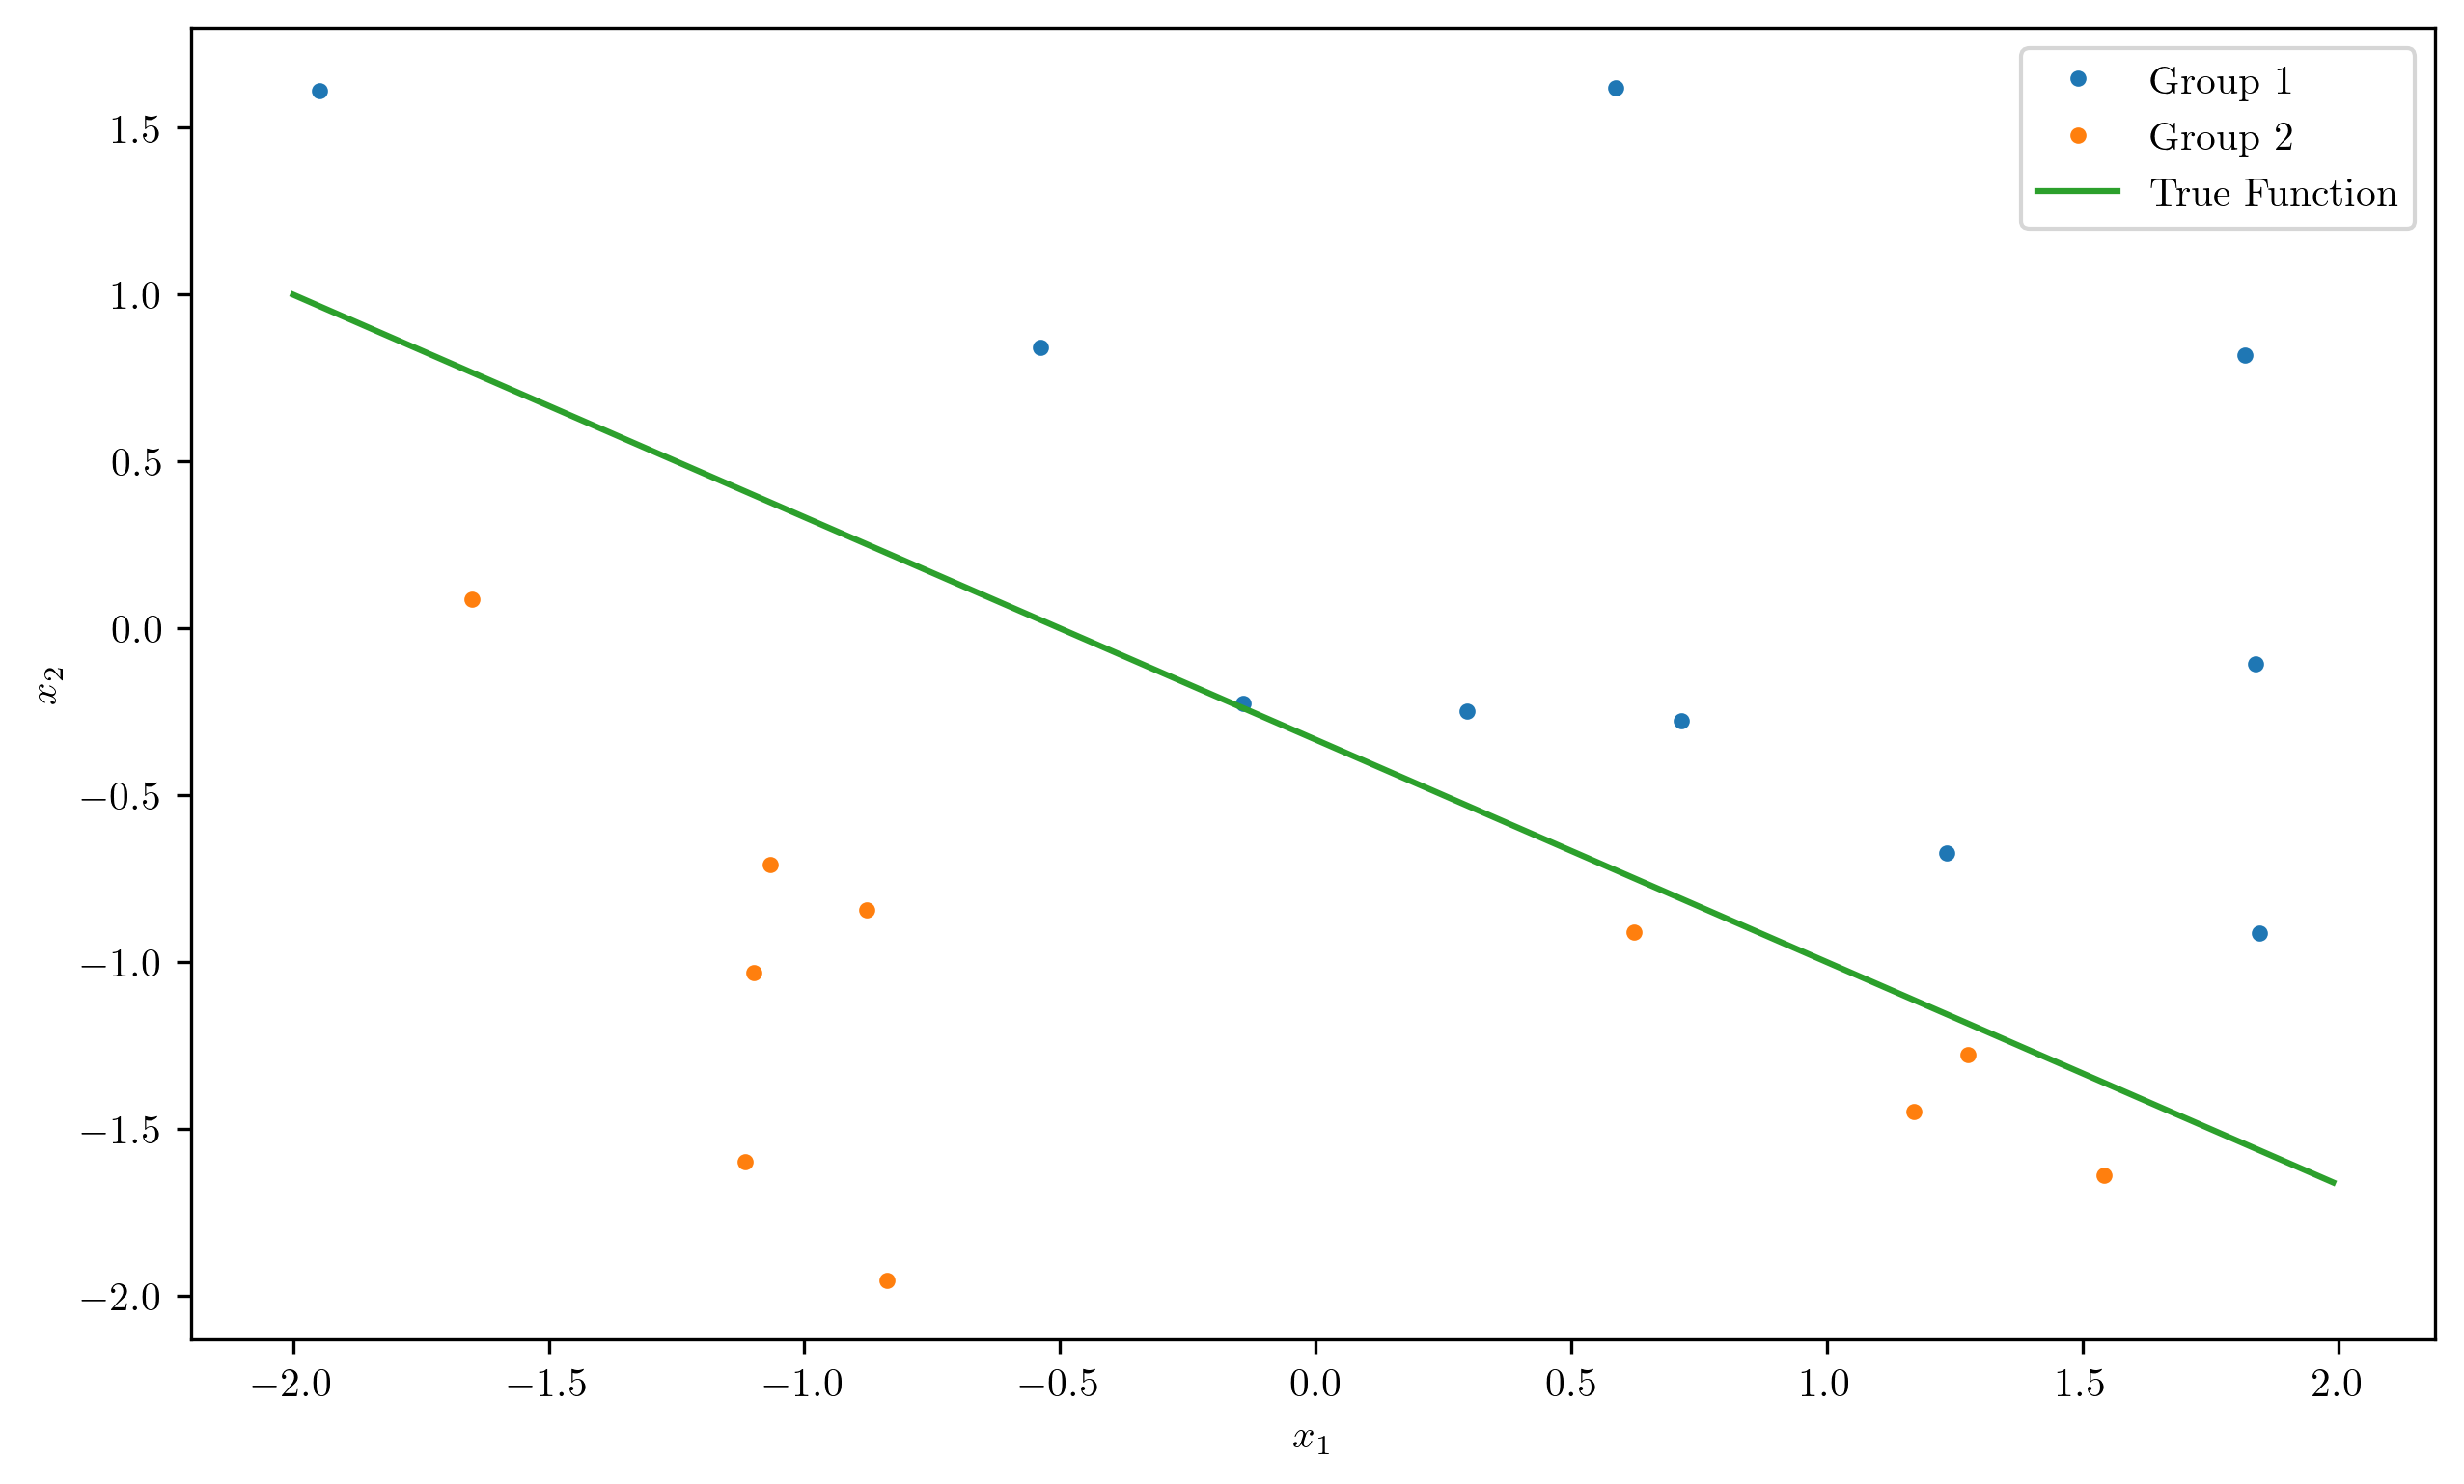

In [9]:
w_true = np.array([1, 2, 3])
g1, g2 = gen_data(w_true, 20)

f_true = boundary_fn(w_true)
domain = np.arange(-2, 2, 0.01)

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(g1[:,0], g1[:,1], '.', label="Group 1")
plt.plot(g2[:,0], g2[:,1], '.', label="Group 2")
plt.plot(domain, f_true(domain), label="True Function")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### b)

In [10]:
class Perceptron:
    def __init__(self, data, target):
        self.features = feature_matrix(*[data[:,i] for i in range(data.shape[1])])
        self.w = np.zeros((data.shape[1]+1,))
        self.target = target
        self.index = np.arange(len(target))
        self.conv = False
        self.epoch = 0
        self.w_log = []
    
    def forward(self):
        return np.sign(self.features @ self.w)
    
    def update(self):
        pred = self.forward()
        self.ics_mis = self.index[pred != self.target]
        
        # Check convergence
        if len(self.ics_mis) == 0:
            self.conv = True
            return
        
        ics_pick = np.random.choice(self.ics_mis, 1)[0]
        x_t = self.features[ics_pick]
        y_t = self.target[ics_pick]
        self.w = self.w + y_t * x_t
        self.epoch += 1
        self.w_log.append(self.w)
        
    def is_converged(self):
        return self.conv
    
    def stamp(self, reduce=False):
        ics = np.linspace(1, self.epoch, self.epoch).astype(int)
        if reduce:
            if self.epoch > 10:
                ics = np.unique(np.round(np.linspace(0, p.epoch-1, 10))).astype(int)
                return zip(ics+1, self.w_log[ics])
            else:
                return zip(ics, self.w_log)
                
        else:
            return zip(ics, self.w_log)
    
    def train(self):
        while not self.conv:
            self.update()
        print("===================================")
        print("Train Completed.")
        print(f"epoch: {self.epoch}")
        print("===================================")
        self.w_log = np.array(self.w_log)

In [11]:
def convert_to_input(g1, g2):
    data = np.row_stack([g1, g2])
    lab1 = np.ones((g1.shape[0],))
    lab2 = -np.ones((g2.shape[0],))
    label = np.concatenate([lab1, lab2])
    return data, label

In [12]:
data, label = convert_to_input(g1, g2)

p = Perceptron(data, label)
p.train()

Train Completed.
epoch: 7


In [14]:
def order(i):
    if i == 1:
        return f"{i}st"
    elif i == 2:
        return f"{i}nd"
    elif i == 3:
        return f"{i}rd"
    else:
        return f"{i}th"

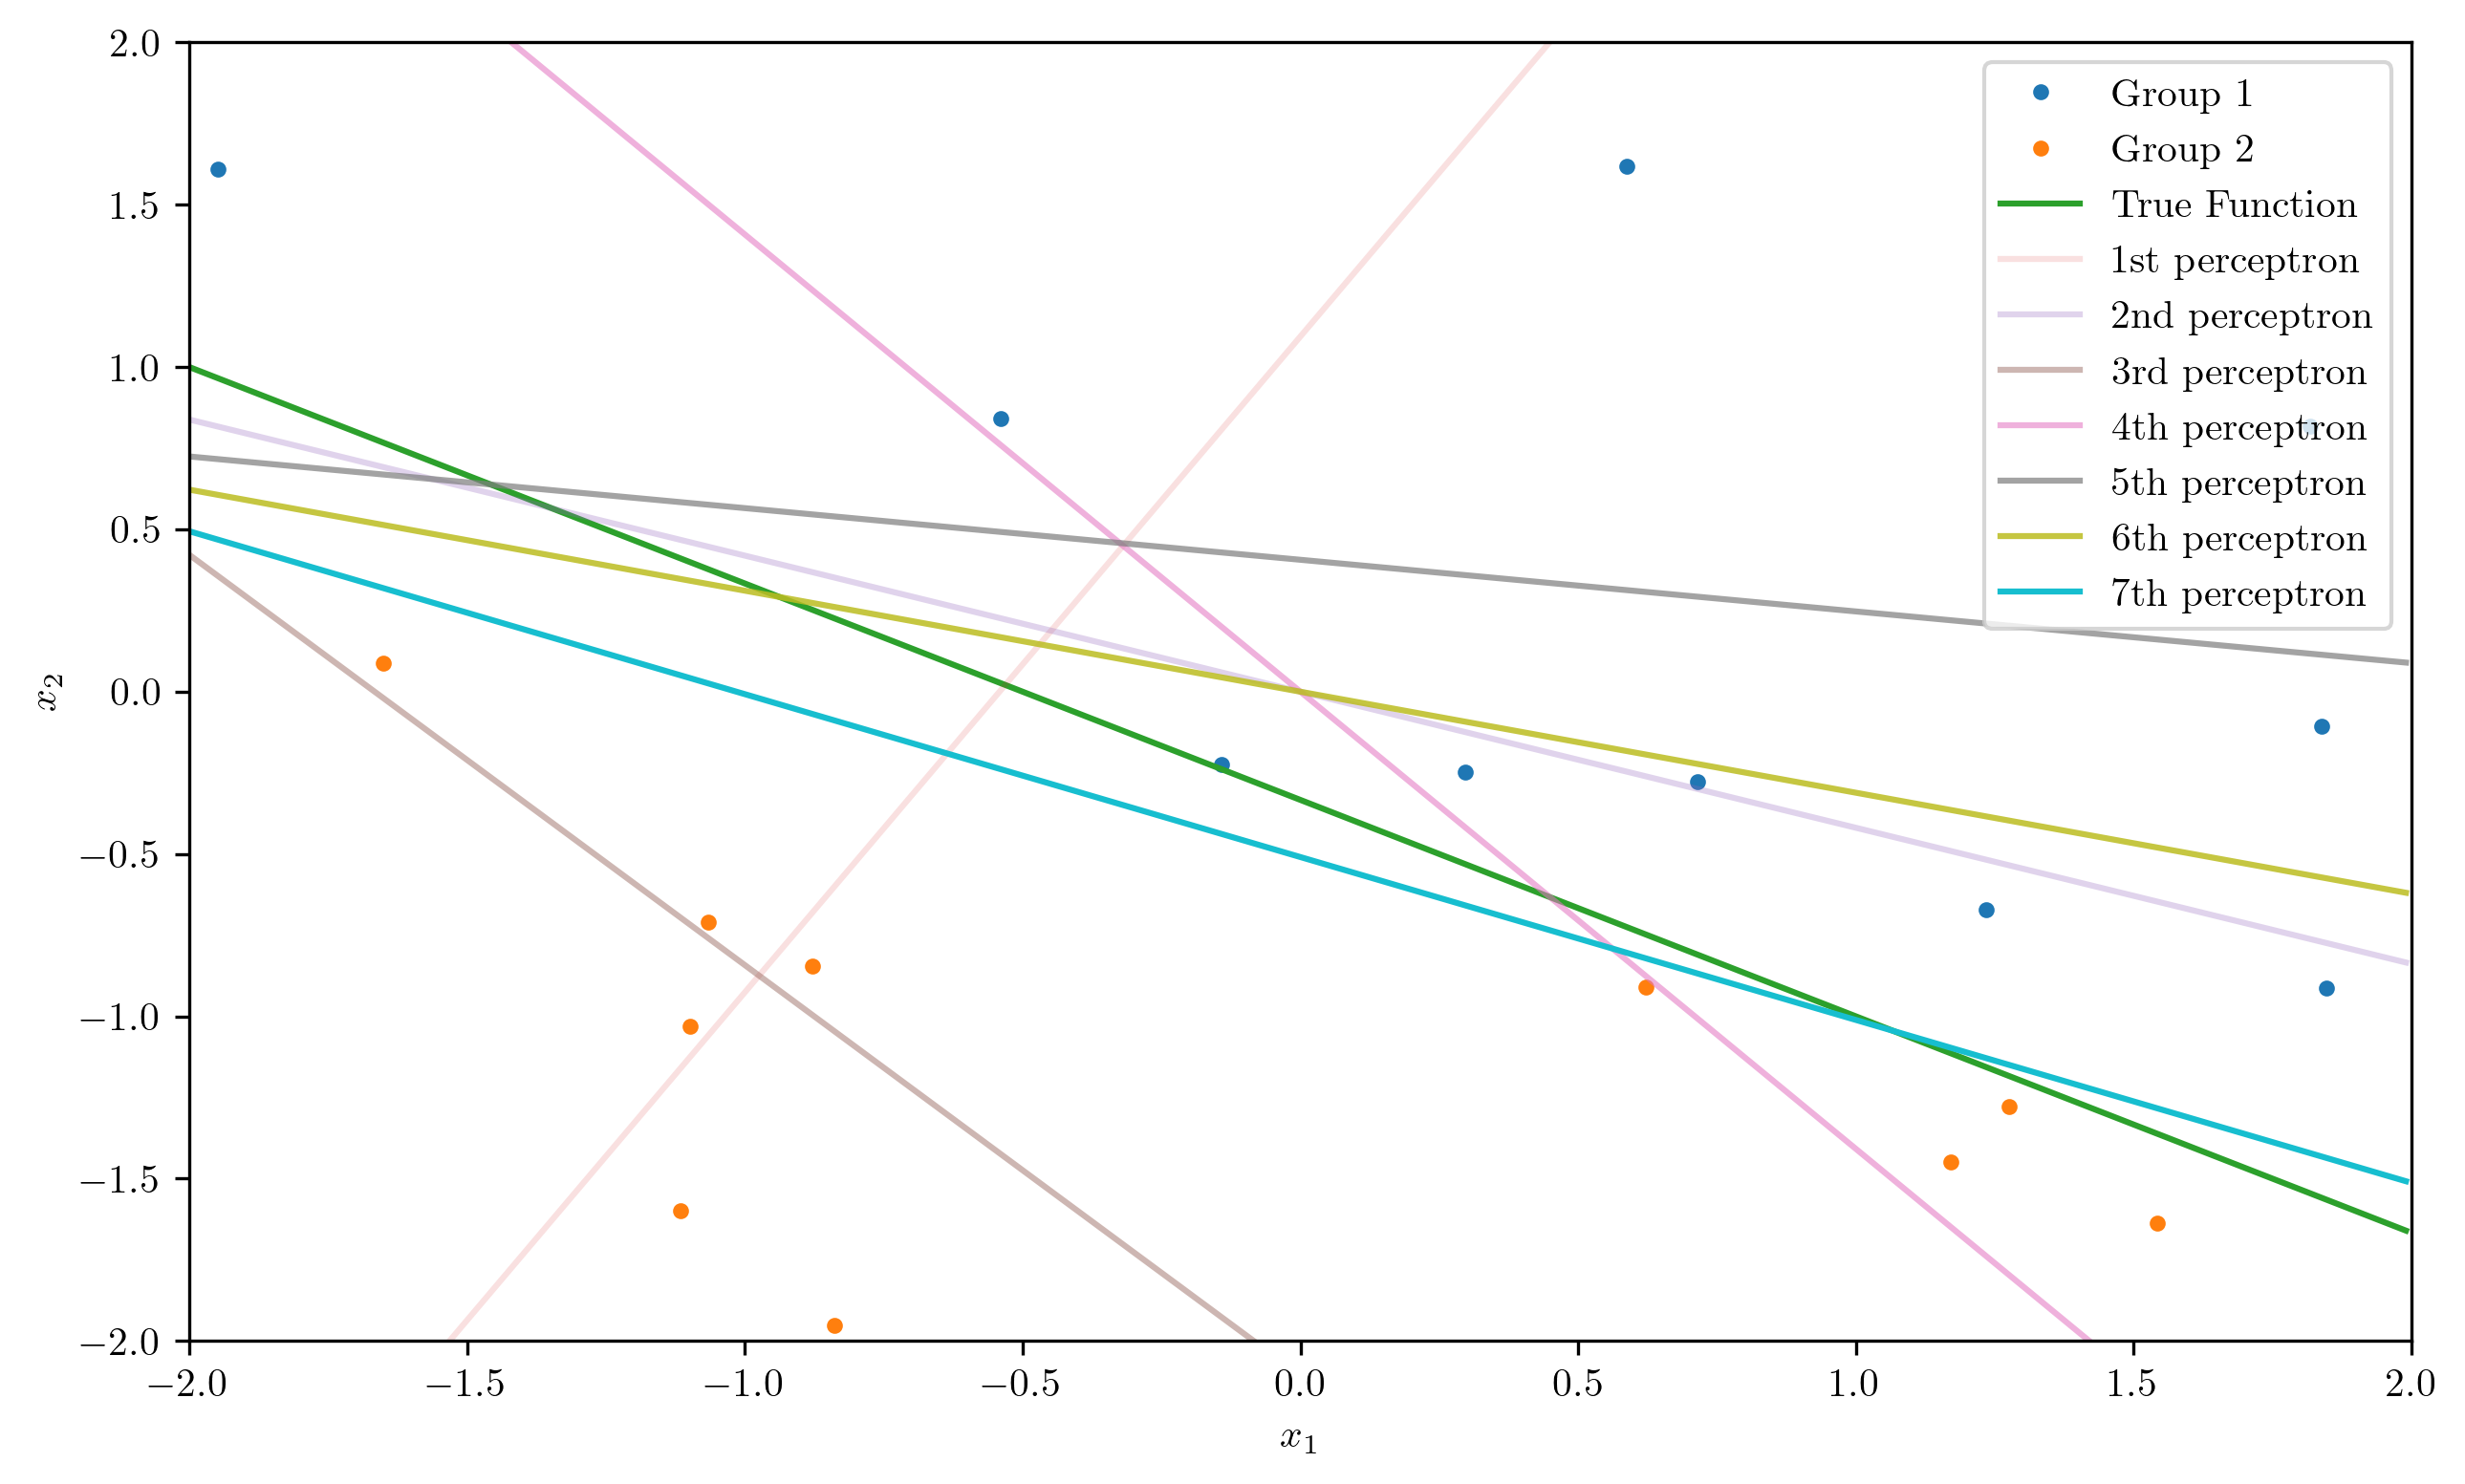

In [15]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(g1[:,0], g1[:,1], '.', label="Group 1")
plt.plot(g2[:,0], g2[:,1], '.', label="Group 2")
plt.plot(domain, f_true(domain), label="True Function")
for (i, w) in p.stamp():
    f = boundary_fn(w)
    plt.plot(domain, f(domain), alpha=i/p.epoch, label=f"{order(i)} perceptron")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### c)

In [16]:
g1, g2 = gen_data(w_true, 20)
data, label = convert_to_input(g1, g2)
p = Perceptron(data, label)
p.train()

Train Completed.
epoch: 2


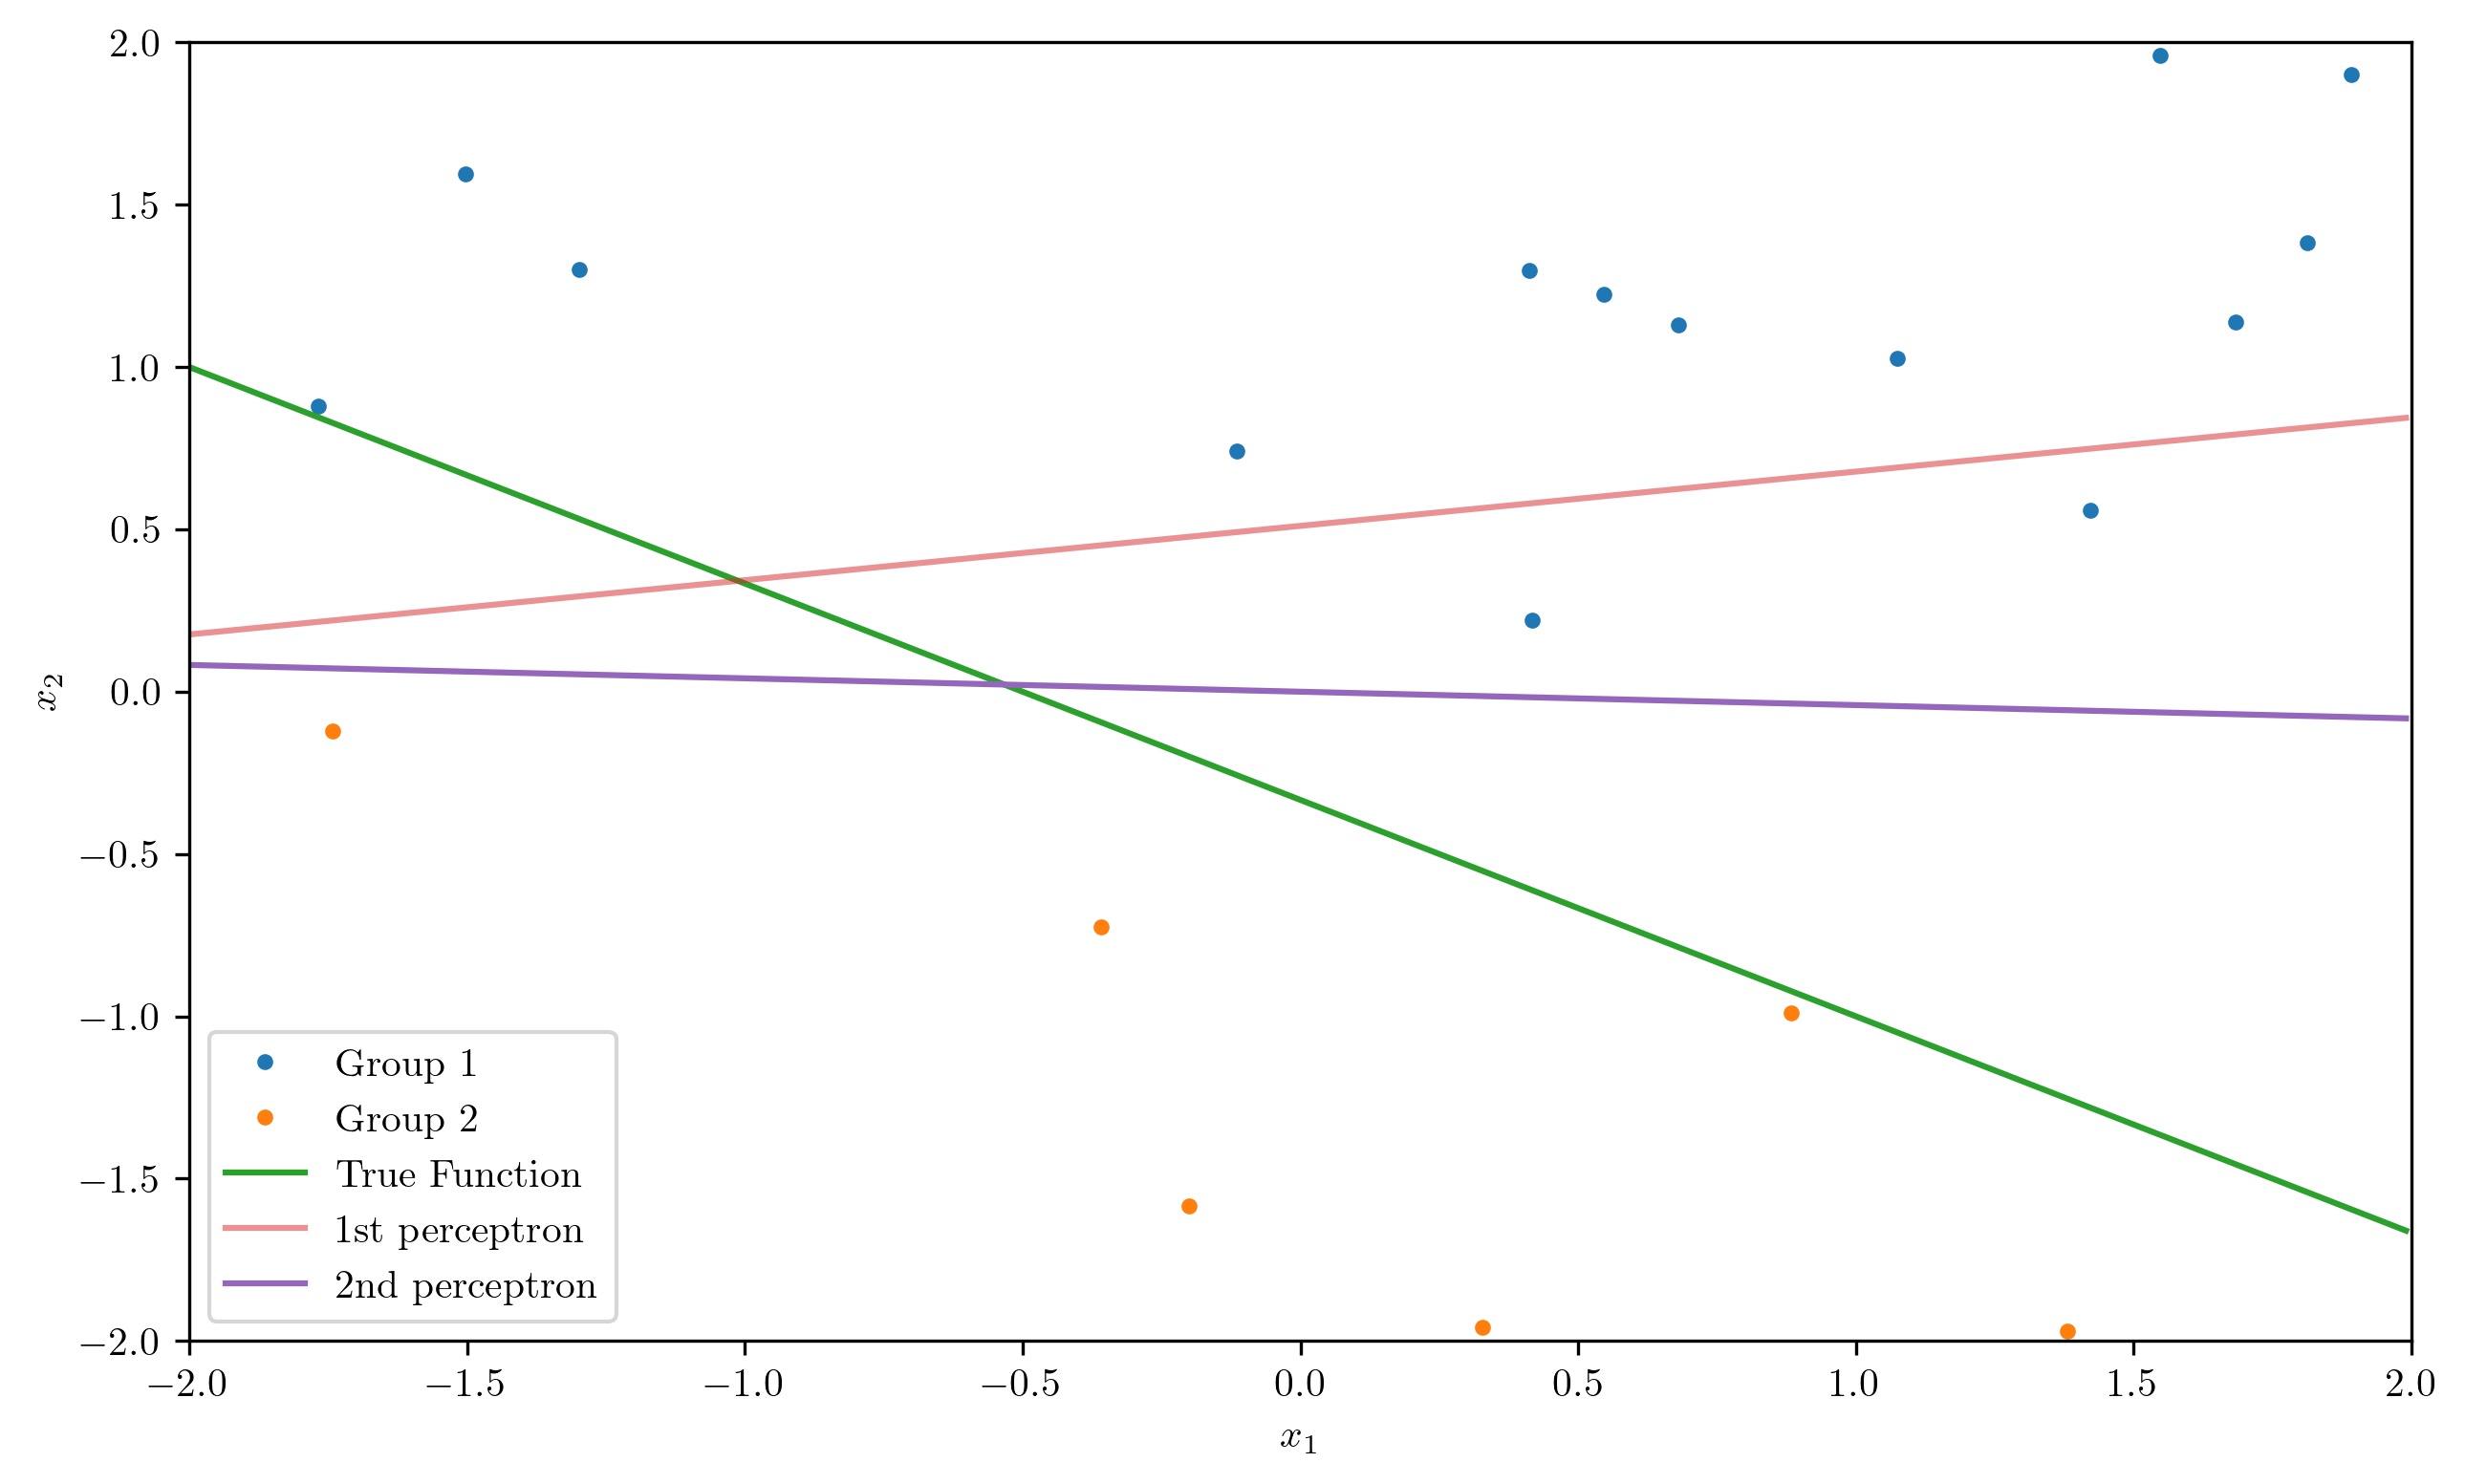

In [17]:
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(g1[:,0], g1[:,1], '.', label="Group 1")
plt.plot(g2[:,0], g2[:,1], '.', label="Group 2")
plt.plot(domain, f_true(domain), label="True Function")
for (i, w) in p.stamp():
    f = boundary_fn(w)
    plt.plot(domain, f(domain), alpha=i/p.epoch, label=f"{order(i)} perceptron")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### d)

Train Completed.
epoch: 11


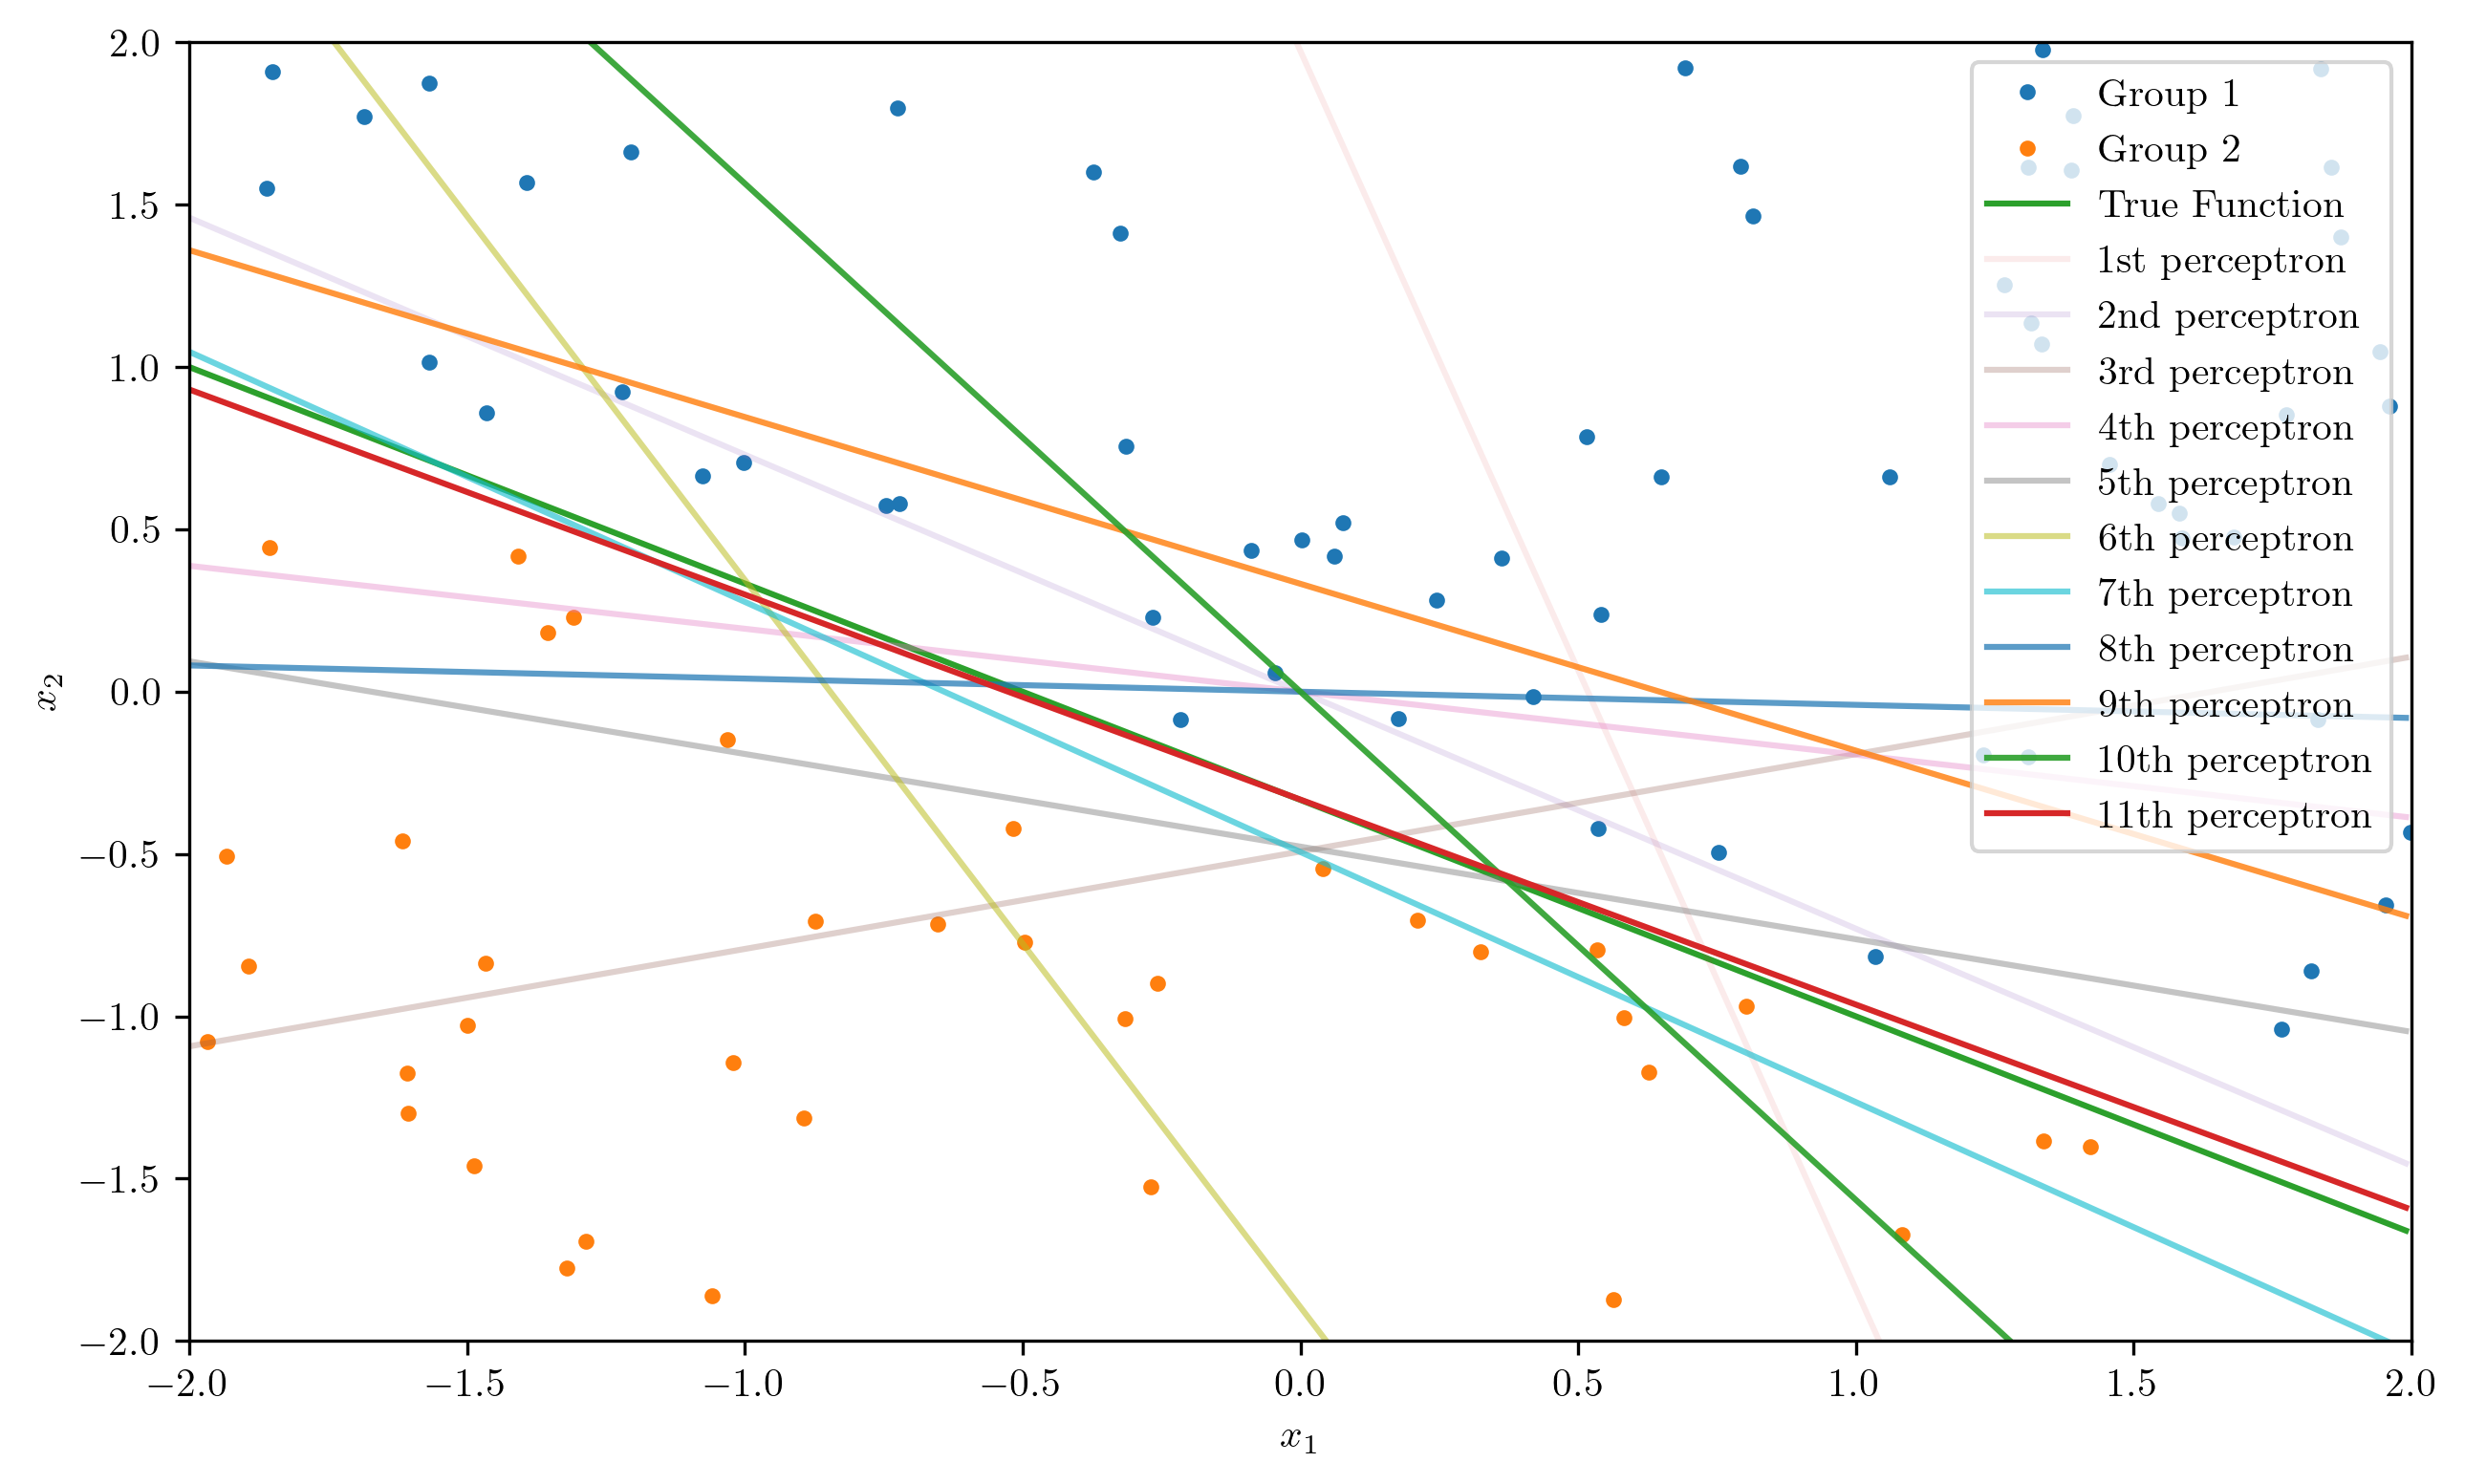

In [18]:
g1, g2 = gen_data(w_true, 100)
data, label = convert_to_input(g1, g2)
p = Perceptron(data, label)
p.train()

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(g1[:,0], g1[:,1], '.', label="Group 1")
plt.plot(g2[:,0], g2[:,1], '.', label="Group 2")
plt.plot(domain, f_true(domain), label="True Function")
for (i, w) in p.stamp():
    f = boundary_fn(w)
    plt.plot(domain, f(domain), alpha=i/p.epoch, label=f"{order(i)} perceptron")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### e)

Train Completed.
epoch: 142


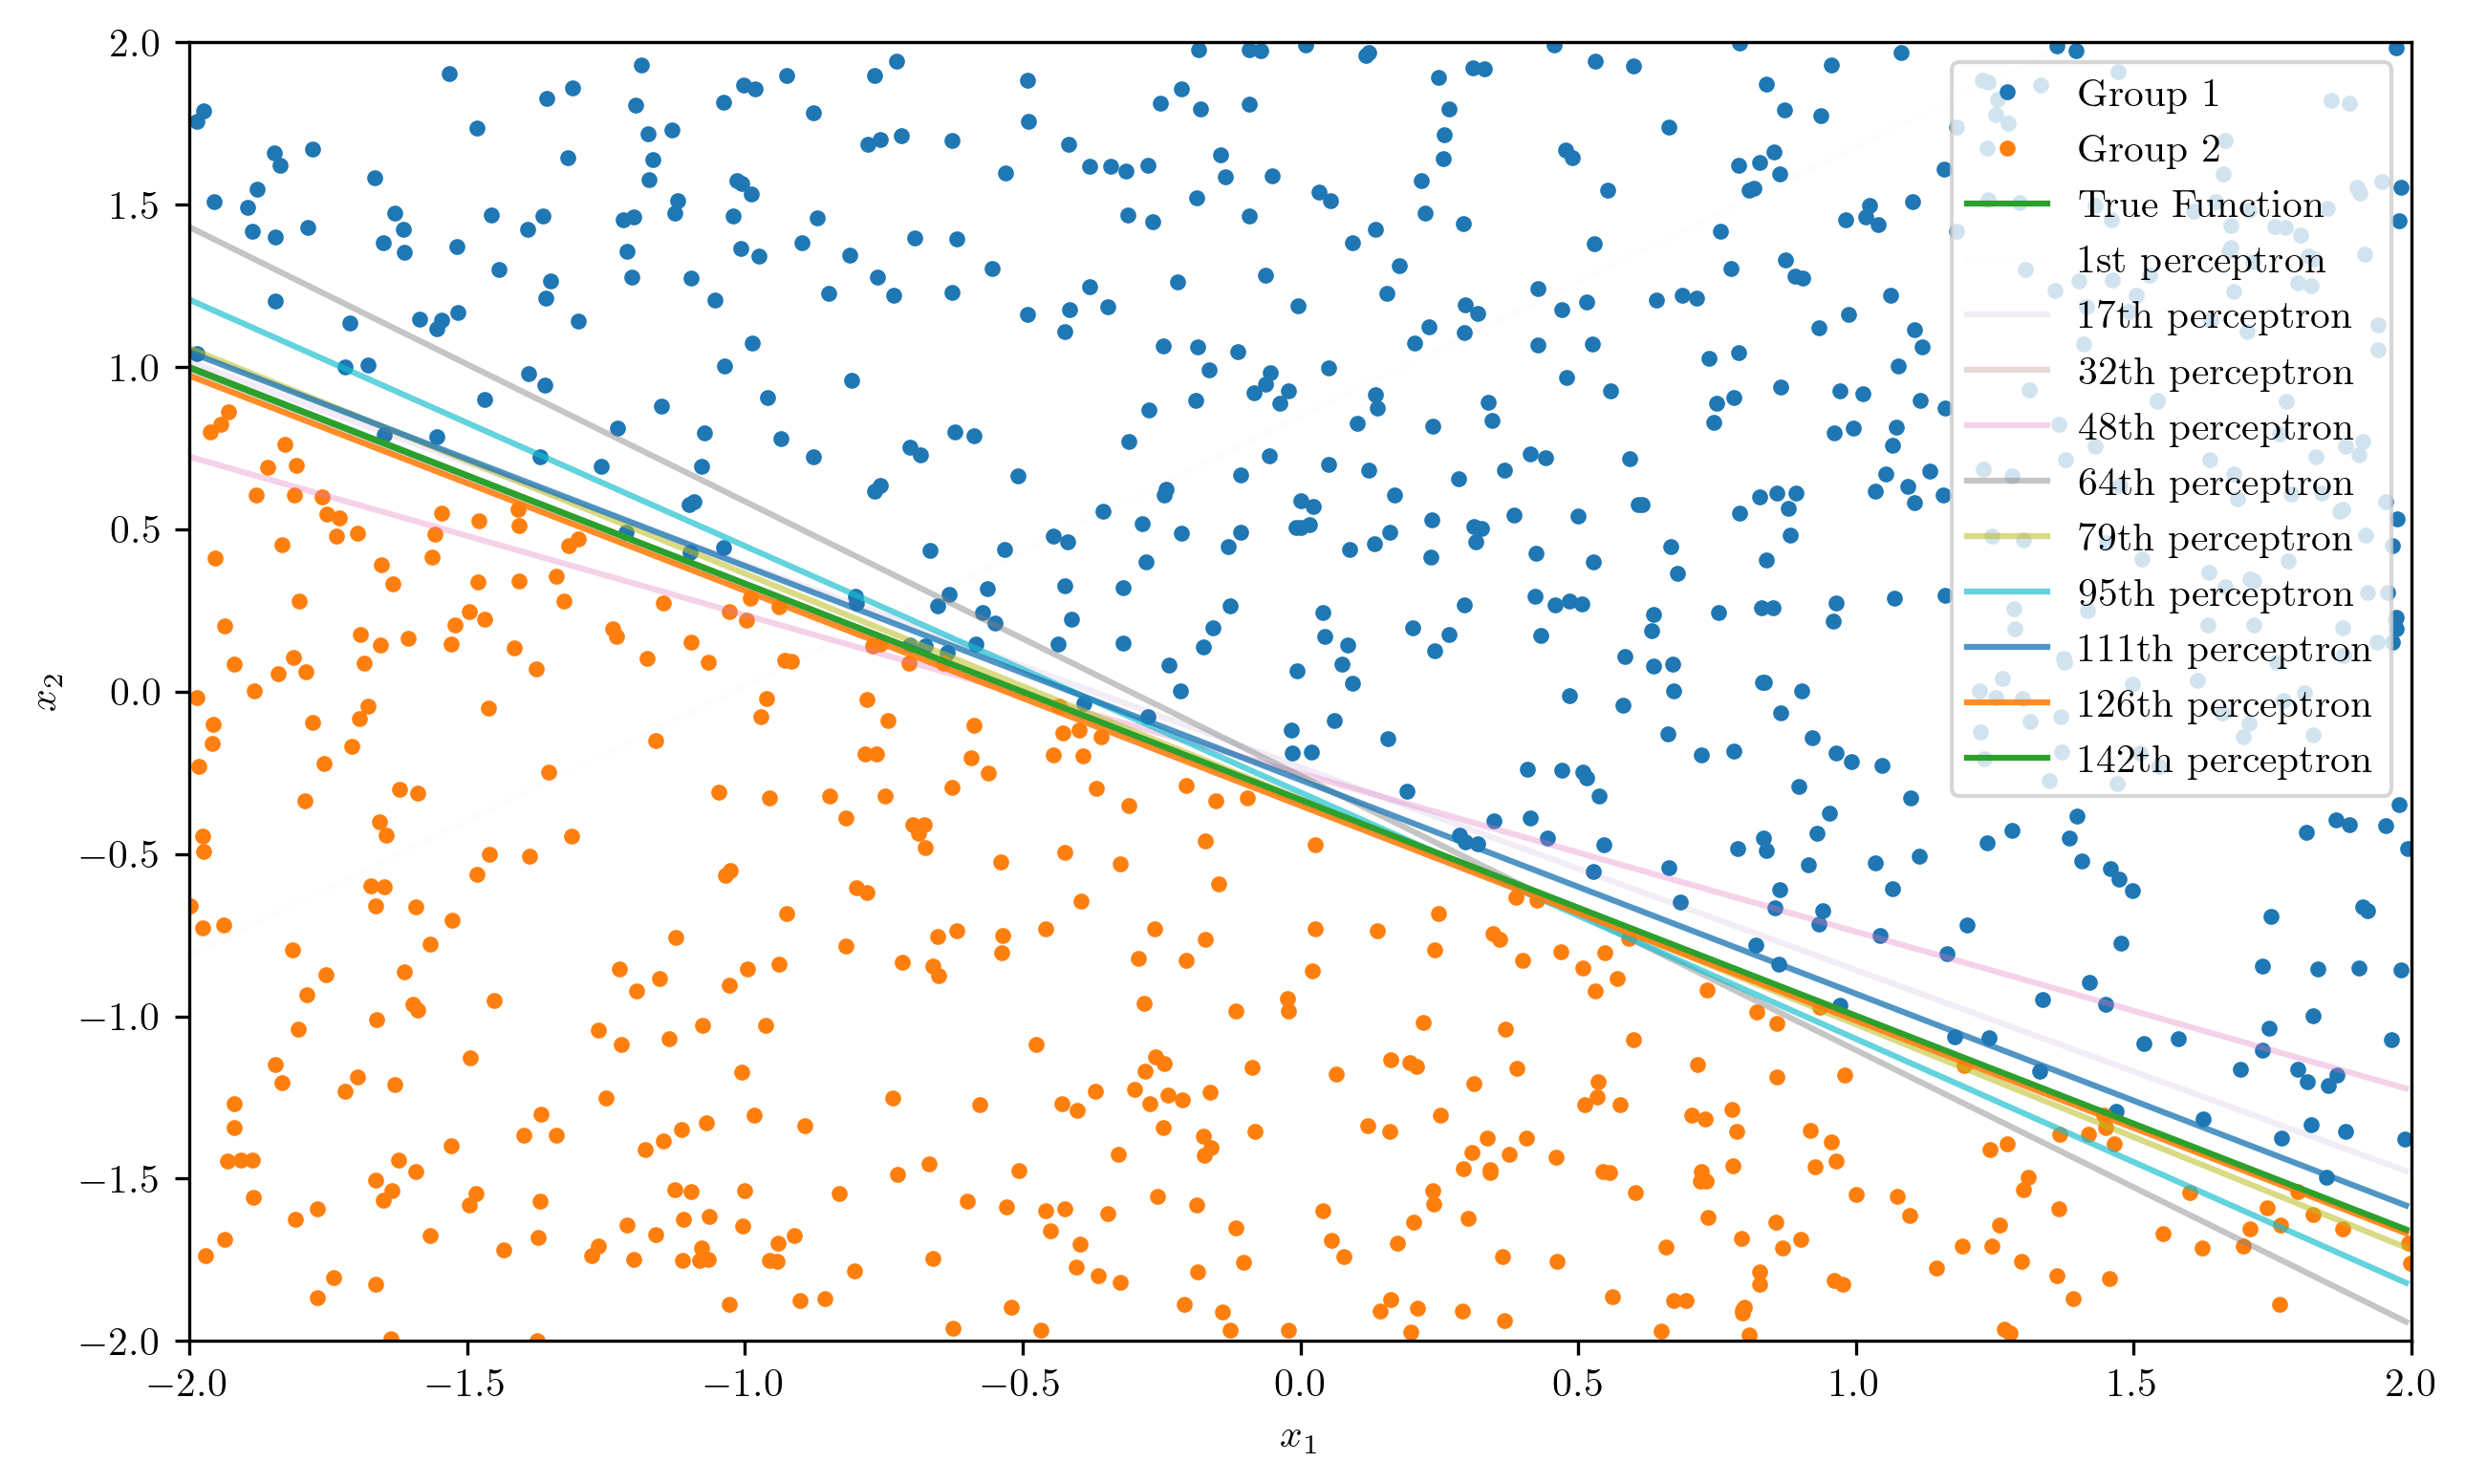

In [19]:
g1, g2 = gen_data(w_true, 1000)
data, label = convert_to_input(g1, g2)
p = Perceptron(data, label)
p.train()

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(g1[:,0], g1[:,1], '.', label="Group 1")
plt.plot(g2[:,0], g2[:,1], '.', label="Group 2")
plt.plot(domain, f_true(domain), label="True Function")
for (i, w) in p.stamp(reduce=True):
    f = boundary_fn(w)
    plt.plot(domain, f(domain), alpha=i/p.epoch, label=f"{order(i)} perceptron")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### f)

In [20]:
def gen_data_10(w, N):
    # Random data
    xs = [np.random.uniform(-2, 2, N) for _ in range(10)]
    
    # Featurize
    X = feature_matrix(*xs)
    
    # Result of perceptron
    c = h(X, w)
    
    # Separate data
    ics1 = c > 0
    ics2 = c <= 0
    g1 = np.column_stack([x[ics1] for x in xs])
    g2 = np.column_stack([x[ics2] for x in xs])
    
    return g1, g2

In [21]:
w_true = np.array([1,2,3,4,5,6,7,8,9,10,11])
g1, g2 = gen_data_10(w_true, 1000)
data, label = convert_to_input(g1, g2)
p = Perceptron(data, label)
p.train()

Train Completed.
epoch: 5430


### g)